# Lecture 3 - Dictionaries, Pandas, and Geopandas
![](images/panda.jpeg)

![](images/UoA_missing_map_poster.png)

### A cool thing I saw on the net this week:
Open Street Map and LLMs (GPT)
https://github.com/rowheat02/osm-gpt

### Objectives
- Dictionaries
  - What, why, how
- Pandas
  - The industry and scientific standard means of tabular data handling*
  - https://pandas.pydata.org/
- Geopandas
  - Making pandas spatial!
  - https://geopandas.org/en/stable/

### Dictionaries
- A dictionary is another type of variable
  - It is useful for storing loosely structured information
  - It uses a key:value structure
  - Denoted using curly brackets {}
  - Often combined with a list
  

In [ ]:
GISCI_dictionary = {
                        "apple":"a delicious round fruit",
                        "bench":"a place to sit next to the footpath",
                        "candy":"something thats tastey but causes cavities",
                        "door":"a portal to another room",
                        "entomologist":"somone that studies bugs",
                        "farce":"a sausage meat mixture",
                        "gas":"a petrochemical nearing end of life",
                        "hatchback":"a car with a rear that enitrely opens",
                        "ice":"the solid state of water",
                        "juice":"a sugary taste fruit drink",
                        "k****":"asdfasdf",
                     }
GISCI_dictionary["bench"]

In [ ]:
GISCI_dictionary


### Dictionary functions
- mydict.keys() gives you the 'key' of the key:value pairing
- mydict.items() give you the contents as a list
- mydict.values() gives you the values

In [ ]:
# Uncomment each line of code one by one and check out what is returned by each function call
GISCI_dictionary.keys()
# webstersDictionary.values()
# webstersDictionary.items()

In [ ]:
# We can use a for loop to run through the keys in dictionary:
for i in GISCI_dictionary.keys():
    print(i)

In [ ]:
# Or we could use it as a way to format a printing of the entire dictionary
for i in webstersDictionary.keys(): # using the key we get from this line...
    print (i + ":\n\t" + webstersDictionary[i]) # ...to call the item/value from the dictionary as we loop through it

### Dictionaries are often multi layered (multi-dimensional)
- Often dictionaries contain lists of dictionaries
- Yes, it is confusing, but creates more freedom

In [ ]:
# Here a multi-level ditionary lets us store the variable 'people, 
# Within which we can then store more information about those people, in another dictionary.
mydict = {"people":[
            {
                "name":"Hyesop",
                 "role":"teacher"
            },
            {
                "name":"Sila",
                 "role":"teacher"
            },
            {
                "name":"Oliver",
                 "role":"tutor"
            }    
            ]}
# print(mydict)
print(mydict["people"])


In [ ]:
# We can add another dictionary within that first one, that contains a totally different set of information...
mydict = {"people":[
            {"name":"hyesop","role":"teacher"},
            {"name":"sila","role":"teacher"},
            {"name":"oliver","role":"tutor"},    
        ],
         "mascots":[
             {"name":"pepper","species":"dog"},
             {"name":"pip","species":"dog"},
             {"name":"harriet","species":"cat"}
         ]}
# print(mydict)
print(mydict["people"])

In [ ]:
# Combine this multi-level dictionary with a for loop and a conditional statement...
for i in mydict["mascots"]: #for every 1st level dict with this key...
    print(str(i))
    if i["species"] == "cat":        # Within that dict, if the value of the key 'species' is cat...
        print ("all hail our new ruler! bow to "+i["name"]+"!") # Do this...
    else:
        print ("who\'s the best? \n\t"+i["name"]+"\'s the best!\n") # Otherwise do this.
        
# And we get the ability to selectively call and use data from different levels within it.

### Why use dictionaries?
- Dictionaries are really useful as they create a bit more freedom in our data strucutre.
- In comparison, in array its a really bad idea to have mixed data types and uneven arrays, however dictionaries are great for this type of data.
<br></br>
- This moves us towards 'unstructured' data. Lots of the info we get from the web is fairly unstrucutred becasue it relies on non-complete datasets. 
  - For example: some data from Twitter (or X as it is now known, booooo) has geolocation, and some does not. 
  <br></br>
- Having said that, using a dictionary doesn't mean _no_ structure, it just means that not all elements of the strucutre will be there. 
  - For example:

## Pandas
![](images/pandas_logo.jpg)

- What is pandas?
  - Pandas is a _very_ powerful data handling and processing library for Python. 
  - It has a blazing fast ability to load and save data from a wide variety of formats (csv,json,excel, etc)
  - It can transform data very quickly, too.
- How do I get it?
  - Run command prompt from anaconda
    - If you forget how, have a look at last week's lecture :)
  - Type: pip install pandas
    - if you are having toruble with this, check in with us in lecture or lab time

### Introducing, the dataframe
- Pandas is all organized around a concept called a DataFrame
- The dataframe is a powerful 2D array
- Pandas brings data transformation, statistical analys, and plotting/visualization directly to you
![](images/pandas_dataframe.jpg)

In [ ]:
# To get started, we need to import the pandas library
# if you get lost in class today, I highly recommend the pandas website
# the tutorials on the site are excellent!
# https://pandas.pydata.org/docs/getting_started
import pandas as pd

In [ ]:
census = pd.read_csv("data/Age.csv")

In [ ]:
census

In [ ]:
census.dtypes
census.info()

### Query the table, asking for a single column of information
- In pandas, a column is a 'series'

In [ ]:
# Get a series (column) of data
census["Name"]

In [ ]:
census.loc[0:2, "Name"]

In [ ]:
print(census[["Name", "pop23_ov65"]])
print(census.iloc[:, 3])

In [ ]:
census.head()
census[["Name", "pop23_ov65"]]

In [ ]:
census[census["Name"] == "Waitemata Local Board Area"]

In [ ]:
ov10m_old = census[(census["pop23_ov65"] > 1000) & (census["Name"] == "Waitemata Local Board Area") ]
print(ov10m_old)

In [ ]:
census.iloc[0:4, 2:5]
print(census.head(20))

### Pandas makes statistically summarizing data easy

In [ ]:
# We can also simply ask pandas for stats
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
census.describe()
census[["pop18_u15"]].describe()
census.set_index('Name', inplace=True, drop=False)

In [ ]:
census

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
census["pop18_u15"].plot(kind="bar")
plt.xlabel("Index")
plt.ylabel("Population under 15 in 2018")
plt.title("Population under 15 in 2018")
plt.show()

In [ ]:
# Select the 'Name' and 'pop18_u15' columns
census_selected = census[['Name', 'pop18_u15']]

In [ ]:
census_selected

In [ ]:
# Sort the DataFrame by the 'pop18_u15' column
census_sorted = census_selected.sort_values(by='pop18_u15')

# Set the 'Name' column as the index but keep it as a column
census_sorted.set_index('Name', drop=False, inplace=True)

# Plot the sorted DataFrame
census_sorted['pop18_u15'].plot(kind='bar')
plt.xlabel("Name")
plt.ylabel("Population under 15 in 2018")
plt.title("Population under 15 in 2018 (Sorted)")
plt.show()

In [ ]:
census_sorted_new = census_sorted.tail(15)

In [ ]:
# Plot the sorted DataFrame
census_sorted_new['pop18_u15'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Name")
plt.ylabel("Population under 15 in 2018")
plt.title("Population under 15 in 2018 (Sorted)")
plt.show()

### Groupby function
- groupby allows us to summarize categorical values in a serries
    - Excel has this function...
    - Pandas does it better/on more data!
        - The covid uk gov database... 

In [ ]:
census.groupby("City")["pop23_tot"].mean().round(2)

In [ ]:
census.groupby("City")["pop23_tot"].mean().round(2)

# Geopandas
- Geopandas is the same as pandas with two important differences
  1. it creates the 'geoSeries'
  2. it creates the 'geoDataFrame'
![](images/geopandas_logo.jpg)

### First, install geopandas

- Open the Anaconda Prompt
  - conda install -c conda-forge geopandas
- https://geopandas.org/getting_started.html

<p style="background:black">
<code style="background:black;color:white">(base) C:\Users\YOUR_USERNAME> conda install -c conda-forge geopandas
</code>
</p>

### Then test in the installation
- To see if it works, just import the library

### Useful packages
- Geopandas (duh!)
- folium (we will install this in a bit)
  - if there is issue, ask in lab!
- fiona (pre-installed: data import and export using GDAL tools)
- PySAL (not needed yet: spatial analysis)
- cartoPy (pre-installed:cartographic and projection)
- shapely (pre-installed:already installed with pandas, but handles the geometery

- remember pip and conda!
<p style="background:black">
<code style="background:black;color:white">(base) C:\Users\YOUR_USERNAME> pip install Descarts 
</code>
</p>

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Geopandas uses the same strucutre but adds geometry
![](images/geodataframe.png)
- https://geopandas.org/getting_started/introduction.html

### What is geometry?
- Good question. 
  - The purpose of geopandas is to add geometry (spatial) data
  - But its also to add spatial operations, too. 
- First however we do need to know what geometry is:
  - Its a represenatation of a spatial location
    - It can only have one CRS (coordinate reference system)
  - It can come in several types, well beyond point, line, and polygon
    - We can actually mix points, lines, and polygons in the same geodataframe
      - I _really_ don't recommend this. It's like mixing array items, but worse
  - Spatial inforamtion is stored as spatially encoded objects (using a library called _shapely_ but we don't really need to know about it, it in turn is built on GDAL)
- Lets use an example we are familiar with and make it spatial

### Loading data
- Really easy to do with geopandas.
- Here is how you load a shapefile
  - Note here that we are actually loading a zip file!
    - This is simply awesome that we can do this, as it means we no longer have to mess about with .shp .shx .prj .dbf
    - You can actually store your entire dataset in a zip file with multiple folders and datasets. it is simply fantastic!


In [ ]:
nzpop = gpd.read_file('data/NZPop23_Age.shp')

In [ ]:
print(nzpop)

<Axes: >

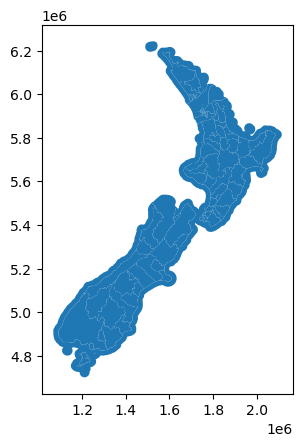

In [39]:
nzpop.plot()

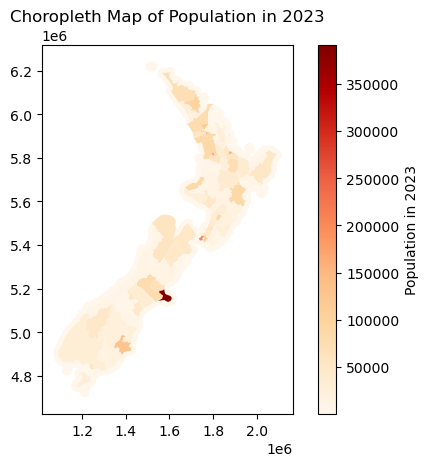

In [47]:
nzpop.plot(column='pop23_tot', legend=True,
           legend_kwds={'label': "Population in 2023",
                        'orientation': "vertical"},
           cmap='OrRd')
plt.title('Choropleth Map of Population in 2023')
plt.show()

In [49]:
import mapclassify as mc

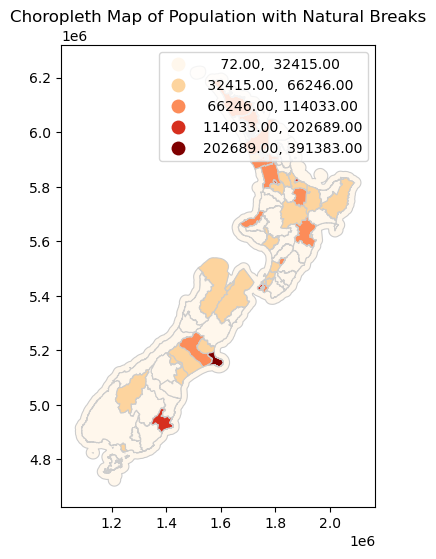

In [52]:
# Classify using Natural Breaks (Jenks)
classifier = mc.NaturalBreaks(y=nzpop["pop23_tot"], k=5)  # k is the number of classes

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
nzpop.plot(column="pop23_tot", cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', 
           scheme='NaturalBreaks', classification_kwds={'k': 5}, legend=True)

# Add a title
plt.title('Choropleth Map of Population with Natural Breaks')

# Show the plot
plt.show()
